<a href="https://colab.research.google.com/github/shreshtha48/Blogs/blob/main/chlorine_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analysis of water quality data**


This document attempts at analyzing the relationship between available residual chlorine levels and the number of water borne diseases for the city of Ahmedabad over a 9 year period ranging from 2011 to 2019

The dataset used here can be found on https://drive.google.com/file/d/1U7Cvg3FiW5--UUT8FpsOgQdGtO8ek5YI/view?usp=drive_link

In [ ]:
#importing neccesary libraries. Libraries are nothing but code written by other developers which helps us with the analysis as we dont have to reinvent the wheel and can focus on analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_blobs
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score
from sklearn.svm import SVR
from sklearn.linear_model import Ridge



In [ ]:
#the pd_read function in pandas allows us to read the data. Here the data is in the form of a csv and pd.read_csv takes in the path to the file as a parameter
data=pd.read_csv("/content/finalanalysis (1).csv")

In [ ]:
#the data.head() function shows us the first five rows of the data
data.head()

,year,zone,biological presence,chlorine,age,jaundice,typhoid,cholera
0,2011,east,2%,13%,0.150855,0.091866,0.039548,0.000953
1,2011,west,2%,4%,0.012903,0.024017,0.015075,0.000767
2,2011,new west,4%,12%,0.008924,0.034443,0.010030,0.000295
3,2011,north,1%,7%,0.100429,0.060821,0.027759,0.001241
4,2011,south,3%,9%,0.135728,0.262829,0.024443,0.002109


As we can see here, the zones in the data are categorical variable. i.e. the number of zones are finite and since we are doing regression analysis, we need to convert the categorical variable to numerical variable. One such way of doing that is called 'one-hot encoding'

**One Hot Encoding the zones to convert them to numerical variable**
For each corresponding zones, a number has been asssigned as follows:


*   East : 0
*   West: 1
*   New West : 2
*   North: 3
*   South : 4
*   Central: 5

So these numbers represent the corresponding zones in the column. The .replace function in python allows us to replace the value of a row(s) of a column to the modified value



In [ ]:
#the zones have been replaced by numbers and inplace=True means that we replace the values inplace of the true values
data['zone'].replace(['east','west','new west','north','south','central'],[0,1,2,3,4,5],inplace=True)

In [ ]:
#adding the diseases column together to create a new one
data['total']=data['age']+data['jaundice']+data['typhoid']+data['cholera']

In [ ]:
#this function shows us the last five rows of the data
data.tail()

,year,zone,biological presence,chlorine,age,jaundice,typhoid,cholera,total
49,2019,1,3%,4%,0.023446,0.013239,0.026679,0.000101,0.063465
50,2019,2,0%,0%,0.035019,0.040732,0.026978,0.000212,0.102940
51,2019,3,1%,1%,0.135372,0.038205,0.096966,0.000702,0.271245
52,2019,4,3%,5%,0.238053,0.075752,0.104264,0.004471,0.422541
53,2019,5,2%,0%,0.148551,0.074393,0.140076,0.002119,0.365139


**Data Visualization**

Data visualization is a crucial part of the data as it helps us understand the data intutively and discover the hidden relationships in the data. Here we are looking at the distribution of various water-borne diseases to make sure that they are normal or approximately normal as most analytical models have an underlying assumption that the data is normal

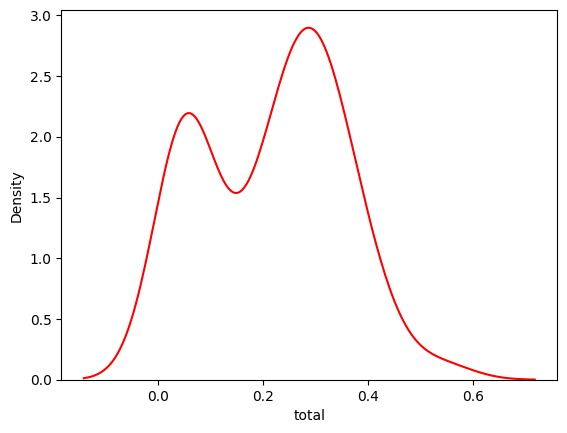

In [ ]:
#the below code is used to plot the density plot of the number of cases of cholera. Since the number of cases of cholera were too large compared to that of other water
#borne diseases, i decided to do them seprately
fig = sns.kdeplot(data['total'],  color="r")
plt.show()

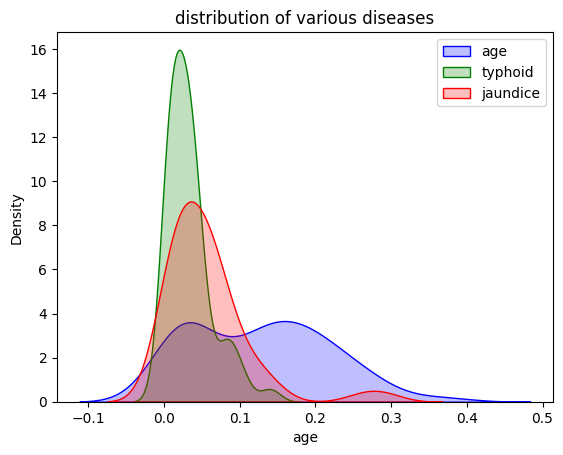

In [ ]:
#these codes shows the distribution of water borne diseases in ahmedabad and they look approximately normal which is fine for our analysis
fig = sns.kdeplot(data['age'], fill=True, color="b",label="age")
fig=sns.kdeplot(data['typhoid'], fill=True, color="g",label="typhoid")
fig=sns.kdeplot(data['jaundice'],fill=True, color="r",label="jaundice")
plt.legend()
plt.title("distribution of various diseases")
plt.show()

Moving on to the water quality section, an important part for us is to identify the relationship between water quality and the diseases. Since the normalization of the diseases data has been done wrt population data from the census, I will be moving forward with normalization of water quality data. This makes sure to give an accurate representation of the data.

The first step to getting that done is by converting the columns containing percentage value to the absoulte value

In [ ]:
#this code is used to strip the data from the %sign since we need the data to be numerical
data['chlorine']=data['chlorine'].str.rstrip("%")
data['biological presence']=data['biological presence'].str.rstrip("%")


In [ ]:
#this code is used to convert the data type from string to int. By default, python stores everything as string
data['chlorine']=data['chlorine'].astype(int)
data['biological presence']=data['biological presence'].astype(int)


In [ ]:
#just checking the data to make sure everything works fine
data.head()

,year,zone,biological presence,chlorine,age,jaundice,typhoid,cholera,total
0,2011,0,2,13,0.150855,0.091866,0.039548,0.000953,0.283222
1,2011,1,2,4,0.012903,0.024017,0.015075,0.000767,0.052761
2,2011,2,4,12,0.008924,0.034443,0.010030,0.000295,0.053692
3,2011,3,1,7,0.100429,0.060821,0.027759,0.001241,0.190250
4,2011,4,3,9,0.135728,0.262829,0.024443,0.002109,0.425109


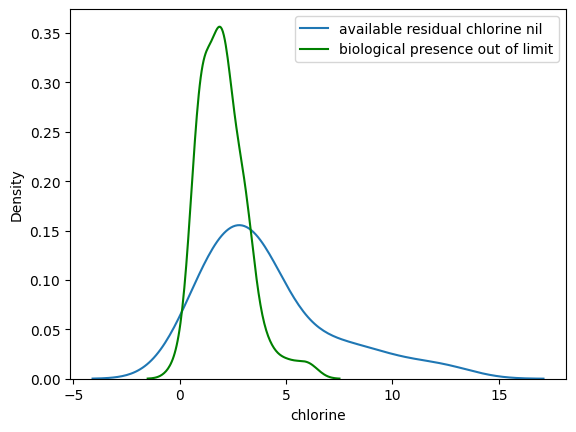

In [ ]:
#plotting th density plots for water quality data
fig=sns.kdeplot(data['chlorine'],label="available residual chlorine nil")
fig=sns.kdeplot(data['biological presence'], color="g",label="biological presence out of limit")
plt.legend()
plt.show()

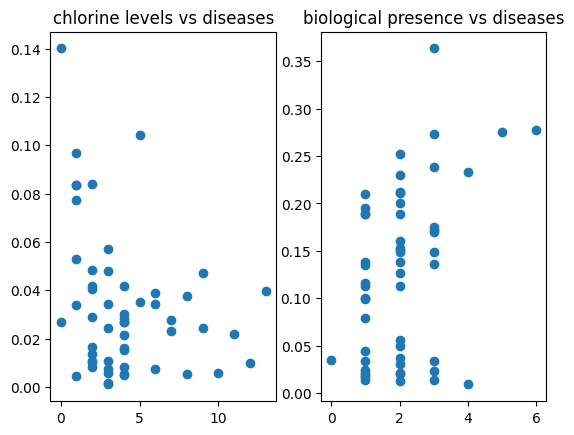

In [ ]:
#scatterplot for multiple variables to see the correlation visually
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)

# Plot the first scatterplot
axes[0].scatter(data['chlorine'], data['typhoid'], label="Series 1")
axes[0].set_title("chlorine levels vs diseases")
axes[1].scatter(data['biological presence'], data['age'], label="Series 1")
axes[1].set_title("biological presence vs diseases")
plt.show()

As we can see from the above graphs, the data shows no relationship and is scattered. Still, we will go forward with the analysis to see what the overall accuracy looks like

In [ ]:
#friedanchisquare is usually use to check for significance in accepting or rejecting the null hypothesis. In our case, since the p-value has been so high, the null hypothesis
#that the data is random and linear has been rejected
from scipy.stats import friedmanchisquare
stat, pvalue = friedmanchisquare(data["chlorine"], data["typhoid"],data['jaundice'],data['cholera'])

print("Statistics:", stat)
print("p-value:", pvalue)

Statistics: 133.62222222222226
p-value: 8.961835451011094e-29


let us move on to finding the correlation between all the present variables of the data using correlation matrix. 1 means that they are correlated which means all of the data of variable A is explained by that of variable B

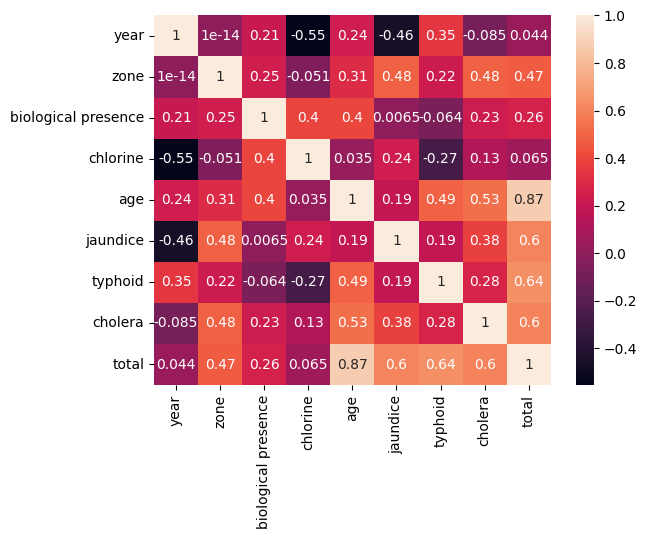

In [ ]:

ax = sns.heatmap(data.corr(), annot=True)

As you can see from the above plot, some variables are highly correlated whereas the other variables show little to no correlation which means that either our original hypothesis is wrong or there are other fctors at play that we dont know about

My goal with working on individual scatterplots is to see if there is a particular data that creates anamoly if all of the diseases are at culprit

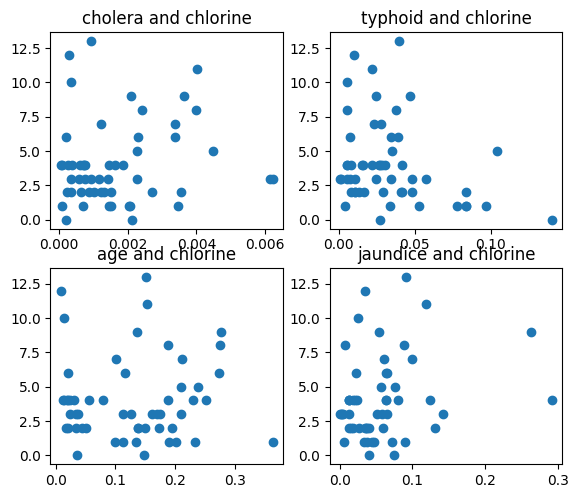

In [ ]:
#scatterplot for multiple variables to see the correlation visually
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False)

# Plot the first scatterplot
axes[0,0].scatter(data['cholera'], data['chlorine'], label="Series 1")
axes[0,0].set_title("cholera and chlorine")

# Plot the second scatterplot
axes[0,1].scatter(data['typhoid'], data['chlorine'], label="Series 2")
axes[0,1].set_title("typhoid and chlorine")

axes[1,0].scatter(data['age'], data['chlorine'], label="Series 2")
axes[1,0].set_title("age and chlorine")

axes[1,1].scatter(data['jaundice'], data['chlorine'], label="Series 2")
axes[1,1].set_title("jaundice and chlorine")

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=1)
plt.show()

**Analysis of the relationship between water borne diseases and the residual chlorine levels for the city of Ahmedabad**

We will use multiple linear regression to find out the correlation between the number of cases of water borne diseaes and the amount of residual chlorine cases

Multiple linear regression happens when there are multiple independent variables for one dependent variable. To start of the anaylsis, we will define x and y where x are the independent variable and y is the dependent variable


Due to our small sample size in order to establish significance, we will have
to take the significance level to be 1%

In [ ]:
#defining x and y variables
x=data[['chlorine','biological presence']]
y=data['total']


In [ ]:
#converting my x values to numpy arrays doing this helps as it is ultimately faster and more accurate. Numpy arrays are also more compatible with the scikit learn lbrary flavour
x1=x.to_numpy()
y1=y.to_numpy()

Text(0.5, 28.999999999999986, 'residual chlorine nil')

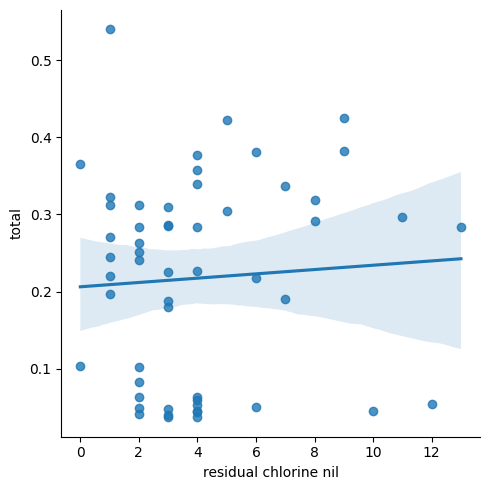

In [ ]:
sns.lmplot(x="chlorine",y="total",data=data)
plt.xlabel("residual chlorine nil")


The usual procedure for creating a regression model is using the data and splitting the data into test and training set. The ideal rule of thumb is about 3/4th of the total data goes into training and the rest in testing. Testing helps us see how our model does on unknown data hence it is really neccesary. However, for data with small sample sizes like ours, splitting it even further can lead to problems and hence we use a modified version of cross validation called leave one out cross validation

**Linear regression using leave one out cross validation**

Linear regression is a prediction machine learning algortihm that is often used for analysis due to it's simplicity and robustness. Here we define the instance of the class Linear regression and leave one out cross validation and then we create an array called scores which takes in scores for each iteration of the regression. Then we run a for loop to put our code into action and use MAE as an accuracy metric

MAE: 0.1153827211286254


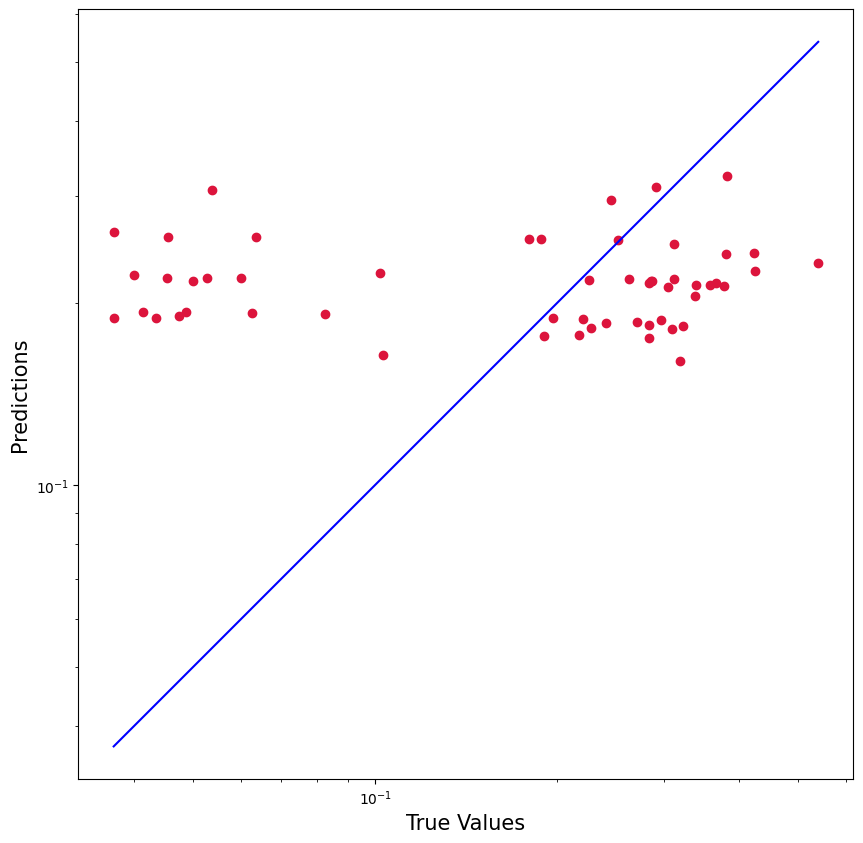

In [ ]:
# Create a linear regression model
model = LinearRegression()

# Perform leave-one-out cross validation
loocv = LeaveOneOut()
scores = []
y_test = []
y_pred = []
for train_index, test_index in loocv.split(x1):
    X_train, X_test = x1[train_index], x1[test_index]
    y_train, y_test_i = y1[train_index], y1[test_index]
    model.fit(X_train, y_train)
    scores.append(np.mean(abs(y_test_i - model.predict(X_test))))
    y_test.extend(y_test_i)
    y_pred.extend(model.predict(X_test))

# Print the MAE
print('MAE:', np.mean(scores))

# Plot the regression line
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_test), max(y_pred))
p2 = min(min(y_test), min(y_pred))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

Using linear regression but with gradient descent optimzation algortihm

MAE: 0.13110015835594038


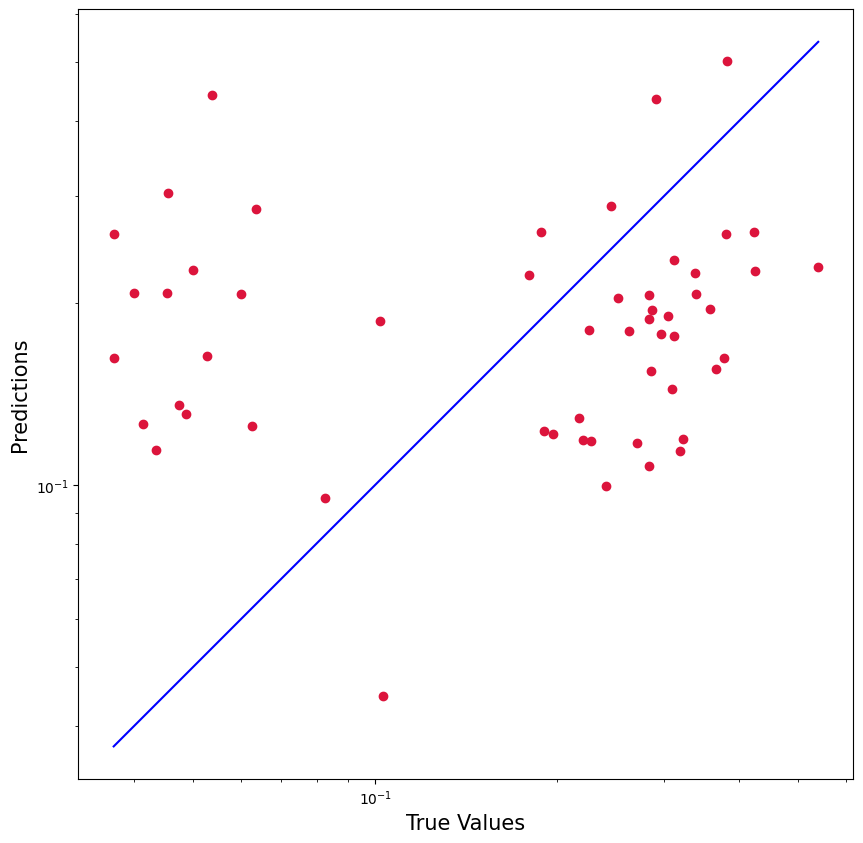

In [ ]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import LeaveOneOut

# Create a linear regression model
model = SGDRegressor(learning_rate='invscaling')

# Perform leave-one-out cross validation
loocv = LeaveOneOut()
scores = []
y_test = []
y_pred = []
for train_index, test_index in loocv.split(x1):
    X_train, X_test = x1[train_index], x1[test_index]
    y_train, y_test_i = y1[train_index], y1[test_index]

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Predict the values for the test data points
    y_pred.append(model.predict(X_test))
    y_test.append(y_test_i)

# Append the predicted values to the y_test array
y_test = np.concatenate(y_test)
y_pred = np.concatenate(y_pred)

# Print the MAE
print('MAE:', np.mean(abs(y_test - y_pred)))

# Plot the regression line
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_test), max(y_pred))
p2 = min(min(y_test), min(y_pred))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

Interpretation of the errors and why MAE:

MAE or mean absolute error is an evaluation metric that states the difference between the actual and predicted point. Foe e.g let's say our MAE is 2 then for actual value of 100, the predicted value is off by 2 units i.e. 98. This sounds fair for values which have variation such as 100-1000 or bigger scales but for our data which is in decimals, having the value shifted by 0.11 units is simply not acceptable

seeing the difference between the actual and the predicted data, we can also see how off the predictions are

**RIdge regression using leave one out cross validation**

Since linear regression didnt work for our data, we can try ridge regression. RIdge regression adds an elment of noise for our data and prevents overfitting. It is usually a very good choice for samples with small data points. we will be following the same steps as that of the linear regression but instead of linear regression, our model will be ridge regression

MAE: 0.11524975288356708


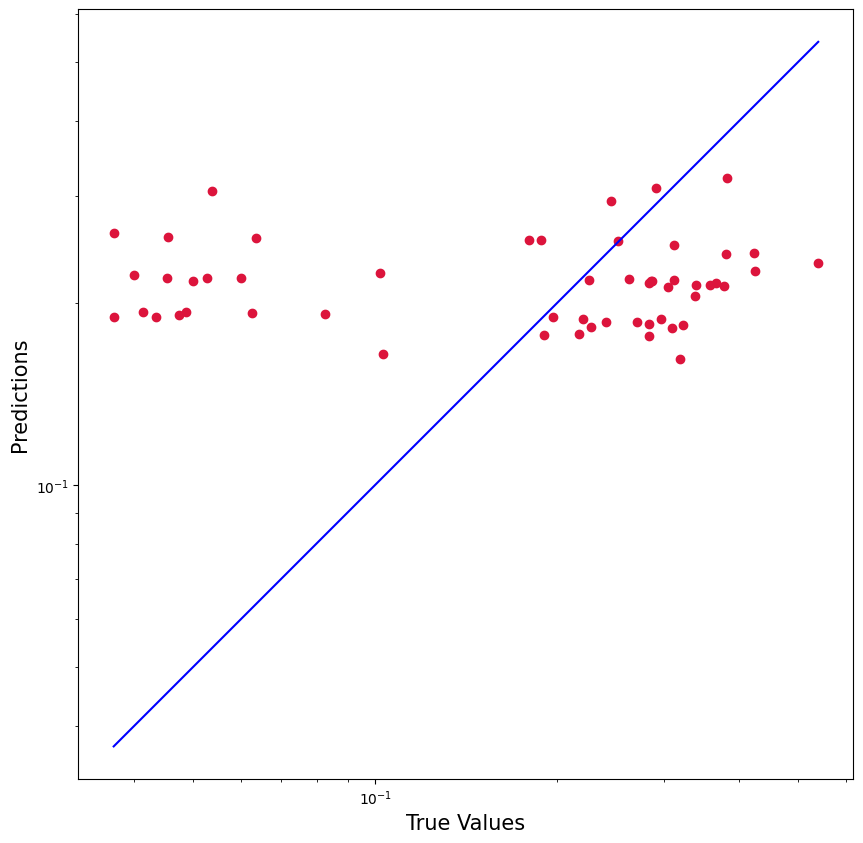

In [ ]:
# Create a linear regression model
model = Ridge()

# Perform leave-one-out cross validation
loocv = LeaveOneOut()
scores = []
y_test = []
y_pred = []
for train_index, test_index in loocv.split(x1):
    X_train, X_test = x1[train_index], x1[test_index]
    y_train, y_test_i = y1[train_index], y1[test_index]
    model.fit(X_train, y_train)
    scores.append(np.mean(abs(y_test_i - model.predict(X_test))))
    y_test.extend(y_test_i)
    y_pred.extend(model.predict(X_test))

# Print the MAE
print('MAE:', np.mean(scores))

# Plot the regression line
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_test), max(y_pred))
p2 = min(min(y_test), min(y_pred))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

Interpretation:

As we can see, the performance of ridge regression is just as bad, as a matter of fact it is slightly worse than that of the linear regression hence this model is not a good choice for our data either. Let us look at non-linear modelling to attempt to quantify the patterns in our data

**Non-linear modelling for the data**

Non-linear modelling is typically used when the data trends can not be explained by linear models. We will attempt to use non linear modelling in our data. However, due to the limited size of data we will not be able to use models like GLMS. Instead, we will attempt to use non-linear kernels of svm regression such as poly and rbf

Non-linear svm kernels:
SVM is a machine learning algortihm that has been used classically for classificaiton tasks. However, it can also be used for regression. In theory, svm uses kernels to map the lower dimensional data into higher dimensions to classify or predict the data. In essence, kernels are nothing but transformation functions applied on the data. We will use the kernels from sklearn library and for the sake of simplicity and consistency, keep all the evaluation metrics same

MAE: 0.11499219365711803


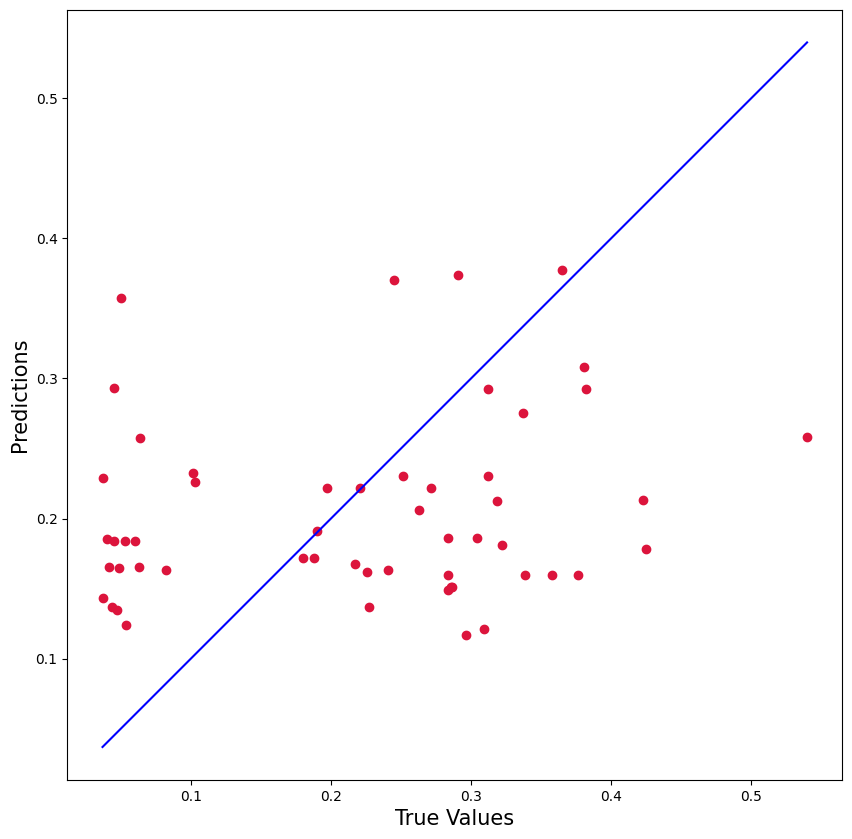

In [ ]:
#reate an SVR model with a non-linear kernel
# Create a linear regression model
model = SVR(kernel='rbf')

# Perform leave-one-out cross validation
loocv = LeaveOneOut()
scores = []
y_test = []
y_pred = []
for train_index, test_index in loocv.split(x1):
    X_train, X_test = x1[train_index], x1[test_index]
    y_train, y_test_i = y1[train_index], y1[test_index]
    model.fit(X_train, y_train)
    scores.append(np.mean(abs(y_test_i - model.predict(X_test))))
    y_test.extend(y_test_i)
    y_pred.extend(model.predict(X_test))

# Print the MAE
scores=np.array(scores)
print('MAE:', np.mean(scores))

# Plot the regression line
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')


p1 = max(max(y_test), max(y_pred))
p2 = min(min(y_test), min(y_pred))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()


Here, the MAE is slightly better than that of the linear models but it is still far off. Let us try with a poly kernel

MAE: 0.1262983583020416


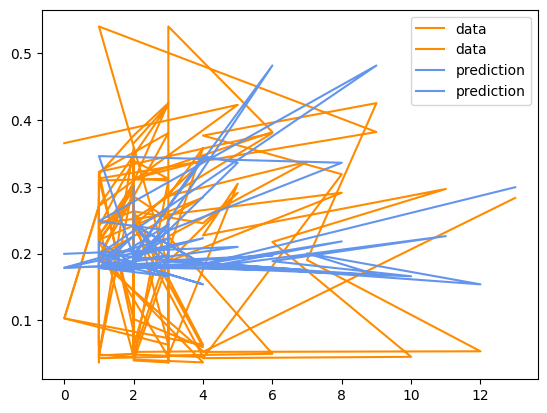

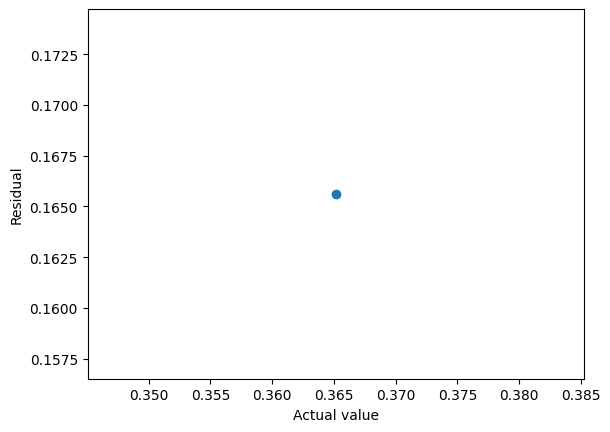

In [ ]:
#reate an SVR model with a non-linear kernel
model = SVR(kernel='poly')

# Perform leave-one-out cross validation
loocv = LeaveOneOut()
scores = []
for train_index, test_index in loocv.split(x1):
    X_train, X_test = x1[train_index], x1[test_index]
    y_train, y_test = y1[train_index], y1[test_index]
    model.fit(X_train, y_train)
    scores.append(np.mean(abs(y_test - model.predict(X_test))))

# Print the MAE
print('MAE:', np.mean(scores))



# Plot the regression line

y_pred = model.predict(x1)
plt.plot(x1, y1, color='darkorange',
            label='data')
plt.plot(x1, y_pred, color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

residuals = y_test - model.predict(X_test)
plt.scatter(y_test, residuals)
plt.xlabel('Actual value')
plt.ylabel('Residual')
plt.show()


As we can see from the data, all of the linear and non-linear models have failed to represent the data accurately

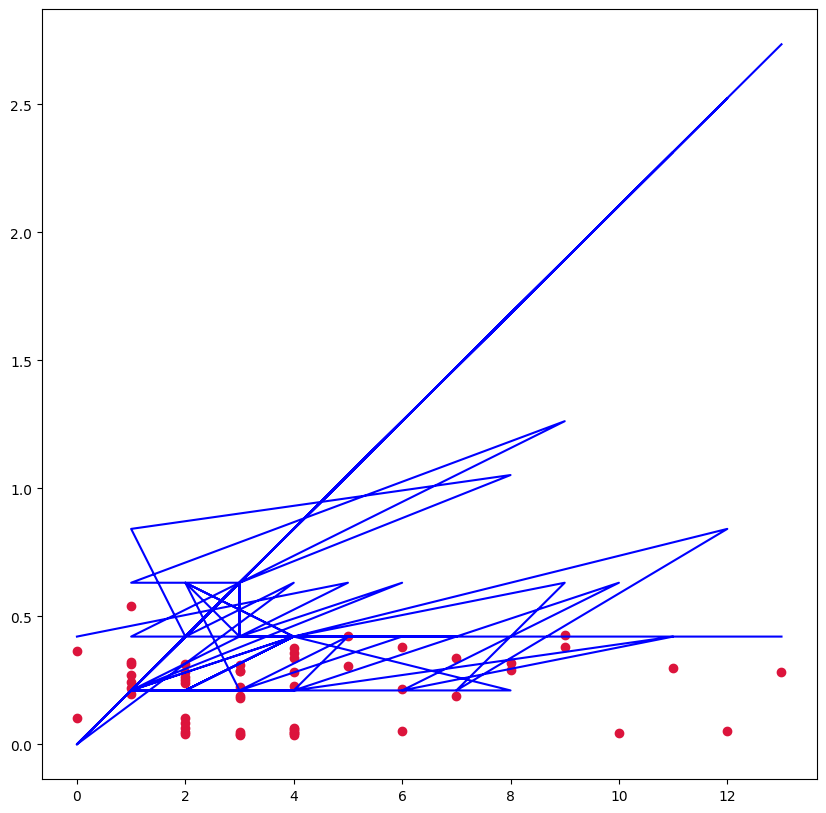

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x3=data[['chlorine','biological presence']]
y3=data['total']


def locally_weighted_linear_regression(x, y, bandwidth):
  """
  Performs locally weighted linear regression on the data points (x, y).

  Args:
    x: The independent variables.
    y: The dependent variables.
    bandwidth: The bandwidth of the kernel.

  Returns:
    The coefficients of the linear regression model.
  """

  weights = np.exp(-np.linalg.norm(x - x.mean(axis=0), axis=1)**2 / (2 * bandwidth**2))
  w_sum = np.sum(weights)
  coefficients = np.dot(weights, y) / w_sum
  return coefficients

def main():
  x = np.array(x3)
  y = np.array(y3)
  bandwidth = 0.5

  # Fit the model to the data
  coefficients = locally_weighted_linear_regression(x, y, bandwidth)

  # Predict the values for the test data points
  y_pred = np.dot(x, coefficients)

  # Plot the data and the regression line
  plt.figure(figsize=(10,10))
  plt.scatter(x[:, 0], y, c='crimson')
  plt.plot(x[:, 0], y_pred, c='blue')

  plt.show()

if __name__ == "__main__":
  main()